# Распознавание рукописных цифр (датасет MNIST)
Сначала посмотрим, как ведет себя при распознавании рукописных букв нейросеть с обычными полносвязными слоями Dense

11490434/11490434 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 4s 9ms/step - loss: 0.2315 - accuracy: 0.9310 - val_loss: 0.0908 - v

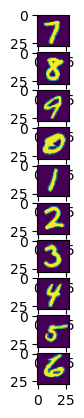

In [2]:
from keras.datasets import mnist # процедуры для извлечения набора данных MNIST
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # базовый класс для задания и обучения нейронной сети
from keras.utils import np_utils # утилиты для предобработки (бинаризации) изображений
import matplotlib.pyplot as plt# библиотеки вывода изображений

batch_size = 128 # на каждой итерации обучения мы обрабатываем 128 примеров обучающей выборки
num_epochs = 20 # мы делаем 20 проходов обучения по обучающей выборке
hidden_size = 512 # каждый скрытый слой содержит 512 нейронов

num_train = 60000 # в базе MNIST 60000 обучающих примеров
num_test = 10000 # в базе MNIST 60000 тестовых примеров

height, width, depth = 28, 28, 1 # картинки MNIST имеют размер 28x28 в оттенках серого
num_classes = 10 # сеть будет различать 10 классров - по одному на цифру

(X_train, y_train), (X_test, y_test) = mnist.load_data() # загружаем данные MNIST

X_train = X_train.reshape(num_train, height * width) # преобразуем данные в одномерные
X_test = X_test.reshape(num_test, height * width) # преобразуем данные в одномерные
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Нормализуем данные на интервал [0, 1]
X_test /= 255 # Нормализуем данные на интервал [0, 1]

Y_train = np_utils.to_categorical(y_train, num_classes) # Преобразование в матрицу классов
Y_test = np_utils.to_categorical(y_test, num_classes) # Преобразование в матрицу классов

inp = Input(shape=(height * width,)) # На входе одномерный вектор из 784 элементов (28*28)
hidden_1 = Dense(hidden_size, activation='relu')(inp) # Первый скрытый слой сети - полносвязный с функцией активации ReLU
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) # Второй скрытый слой сети - полносвязный с функцией активации ReLU
out = Dense(num_classes, activation='softmax')(hidden_2) # Выходной слой сети - полносвязный с функцией активации softmax

model = Model(inputs=inp, outputs=out) # Чтобы определить модель ИНС достаточно определить параметры входного и выходного слоев
model.summary() # Выводим структуру сети

model.compile(loss='categorical_crossentropy', # используем кроссэнтропийную функцию ошибки
              optimizer='adam', # используем алгоритм оптимизации Adam
              metrics=['accuracy']) # accuracy - функция оценки точности модели (не используется для обучения), соответствует числу корректно определенных классов

model.fit(X_train, Y_train, # Обучаем модель на обучающей выборке...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...сохраняем 10% выборки для валидации в процессе обучения
model.evaluate(X_test, Y_test, verbose=1) # Оцениваем обученную модель по тестовой выборке

#Выведем ответ сети по 10 последним тестовым примерам и сравним с изображениями
f, mytest = plt.subplots(10,1)
for i in range(num_test-10, num_test):
    mytest[i-(num_test-10)].imshow((X_test[i].reshape(28,28)))
    print(model.predict(X_test[i].reshape(1,784)))

# Создадим простейшую сверточную сеть
Посмотрим, как справится сеть из двух сверточных слоев с одним выходным полносвязным.

(28, 28)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2686 - accuracy: 0.9478 - val_loss: 0.1079 - val_accuracy: 0.

Epoch 50/50
1/1 [==============================] - 0s 72ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
1/1 [==============================] - 0s 19ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
1/1 [==============================] - 0s 17ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 21ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1

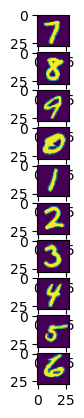

In [3]:
from keras.datasets import mnist # процедуры для извлечения набора данных MNIST
import matplotlib.pyplot as plt# библиотеки вывода изображений
# from keras.utils import to_categorical#для преобразования ответов в классы
from keras.models import Sequential # импорт последовательной модели ИНС
from keras.layers import Input, Dense, Conv2D, Flatten # слои - входной, полносвязный, сверточный, преобразующий 2D-данные в 1D-данные;
from keras.utils import np_utils # утилиты для предобработки (бинаризации) изображений

(X_train, y_train), (X_test, y_test) = mnist.load_data() # Загрузка данных из базы

print(X_train[0].shape) # проверка размера изображения

#приведение размеров обучающего и датасетов к стандарту 28*28
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

y_train = np_utils.to_categorical(y_train) # Преобразование в матрицу классов
y_test = np_utils.to_categorical(y_test) # Преобразование в матрицу классов 
print(y_train[0])

model = Sequential()#создаем последовательную ИНС и добавляем 2 сверточных слоя, слой понижения размерности и полносвязный слой
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

#компилируем модель с оптимизатором Adam, функцией ошибки категориальной кроссэнтропии и метрикоц точности - доля верных ответов
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#обучаем модель
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

#предскажем первые 10 примеров из тестового датасета
print(model.predict(X_test[:10]))

model.evaluate(X_test, y_test, verbose=1) # Оцениваем обученную модель по тестовой выборке

#Выведем ответ сети по 10 последним тестовым примерам и сравним с изображениями
f, mytest = plt.subplots(10,1)
for i in range(num_test-10, num_test):
    mytest[i-(num_test-10)].imshow((X_test[i].reshape(28,28)))
    print(model.predict(X_test[i].reshape(1,28,28,1)))

# Классическая архитектура Яна Лекуна LaNet5
![Архитектура сети LaNet5](./LaNet5.png)

(28, 28)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)       

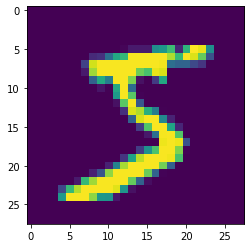

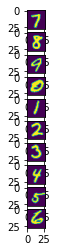

In [1]:
from keras.datasets import mnist # процедуры для извлечения набора данных MNIST
import matplotlib.pyplot as plt# библиотеки вывода изображений
# from keras.utils import to_categorical#для преобразования ответов в классы
from keras.models import Sequential # импорт последовательной модели ИНС
from keras.models import Model # basic class for specifying and training a neural network
import keras.layers as layers
# from keras.layers import Input, Dense, Conv2D, Flatten # слои - входной, полносвязный, сверточный, преобразующий 2D-данные в 1D-данные;
from keras.utils import np_utils # утилиты для предобработки (бинаризации) изображений

batch_size = 128 # на каждой итерации обучения мы обрабатываем 128 примеров обучающей выборки
num_epochs = 10 # мы делаем 20 проходов обучения по обучающей выборке
hidden_size = 512 # каждый скрытый слой содержит 512 нейронов

num_train = 60000 # в базе MNIST 60000 обучающих примеров
num_test = 10000 # в базе MNIST 60000 тестовых примеров

height, width, depth = 28, 28, 1 # картинки MNIST имеют размер 28x28 в оттенках серого
num_classes = 10 # сеть будет различать 10 классров - по одному на цифру

(X_train, y_train), (X_test, y_test) = mnist.load_data() # Загрузка данных из базы

plt.imshow(X_train[0])
print(X_train[0].shape) # проверка размера изображения

#приведение размеров обучающего и датасетов к стандарту 28*28
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

y_train = np_utils.to_categorical(y_train) # Преобразование в матрицу классов
y_test = np_utils.to_categorical(y_test) # Преобразование в матрицу классов 
print(y_train[0])

inp = layers.Input(shape=(height, width, 1)) # На входе одномерный вектор из 784 элементов (28*28)
hidden_1 = layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1))(inp)
hidden_2 = layers.AveragePooling2D()(hidden_1)
hidden_3 = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(hidden_2)
hidden_4 = layers.AveragePooling2D()(hidden_3)
hidden_5 = layers.Flatten()(hidden_4)
hidden_6 = layers.Dense(units=120, activation='relu')(hidden_5)
hidden_7 = layers.Dense(units=84, activation='relu')(hidden_6)
out=layers.Dense(num_classes, activation='softmax')(hidden_7) # Выходной слой сети - полносвязный с функцией активации softmax

model = Model(inputs=inp, outputs=out) # Чтобы определить модель ИНС достаточно определить параметры входного и выходного слоев
model.summary()

#компилируем модель с оптимизатором Adam, функцией ошибки категориальной кроссэнтропии и метрикоц точности - доля верных ответов
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#обучаем модель
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs)

#предскажем первые 10 примеров из тестового датасета
print(model.predict(X_test[:10]))

model.evaluate(X_test, y_test, verbose=1) # Оцениваем обученную модель по тестовой выборке

#Выведем ответ сети по 10 последним тестовым примерам и сравним с изображениями
f, mytest = plt.subplots(10,1)
for i in range(num_test-10, num_test):
    mytest[i-(num_test-10)].imshow((X_test[i].reshape(28,28)))
    print(model.predict(X_test[i].reshape(1,28,28,1)))

Как выглядят значения сверток первого сверточного слоя:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 0.57264274  0.         59.72586   ]
 [14.93942    82.53277    85.49455   ]
 [ 0.          0.          0.        ]]
[[   0.        -46.134785    0.      ]
 [   0.          0.          0.      ]
 [-174.41222  -108.19292  -163.05011 ]]
[[ 0.        0.       39.150585]
 [57.004307 25.454311  0.      ]
 [76.70316   0.        0.      ]]
[[ -94.57898    -16.098463     0.       ]
 [   0.           0.         -66.52418  ]
 [   0.          -6.3940473 -127.84734  ]]
[[ 0.       27.600477 25.624645]
 [37.606995 49.63022  90.726654]
 [18.334442  0.       13.255417]]
[[-104.30428     0.          0.      ]
 [   0.          0.          0.      ]
 [   0.        -96.506165    0.      ]]
[[ 0.        0.        0.      ]
 [85.907486  0.        0.      ]
 [49.495224  0.        0.      ]]
[[-139.58437   -73.37947   -74.15144 ]
 [   0.       -177.49657  -255.      ]
 [   0.        -74.84766   -51.870995]]
[[  0.        0.      111.54772]
 [  0.       88.95469   0.     ]
 [  0.        0.        0.     ]]
[

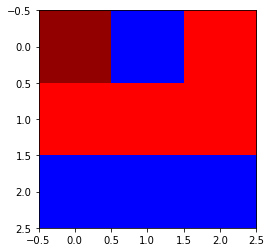

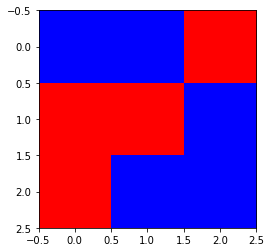

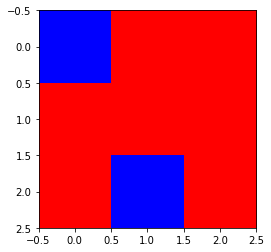

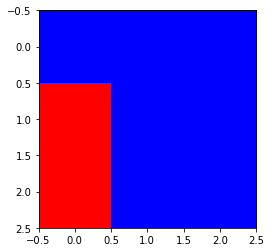

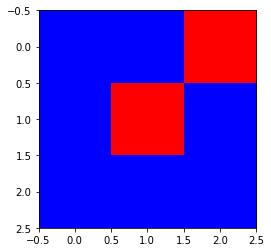

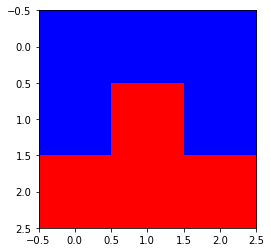

In [2]:
import numpy as np
convolutions = model.layers[1].get_weights()[0]
#нормализуем значение сверток на интервал однобайтного целого для отображения в графике:

maxVal = convolutions.max()
minVal = convolutions.min()
absMax = max(abs(minVal),abs(maxVal))

convolutions = (convolutions / absMax)*255


for outputChannel in range(6):
    for inputChannel in range(1):
        convolut = convolutions[:,:,inputChannel,outputChannel]

      #отрицательные значения - оттенками синего, положительные - оттенками красного
        imageRed = np.array(convolut)
        imageBlue = np.array(convolut)
        imageRed[imageRed<0] = 0
        imageBlue[imageBlue>0]= 0

        print(imageRed)
        print(imageBlue)

        finalImage = np.zeros((convolut.shape[0],convolut.shape[1],3))
        finalImage[:,:,0] = imageRed
        finalImage[:,:,2] = -imageBlue

        #plot image here
        plt.figure()  
        plt.imshow(finalImage) 

И посмотрим на карты активации для первого сверточного слоя и разных сверток:

(1, 28, 28, 1)
(1, 26, 26, 6)


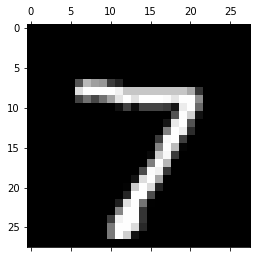

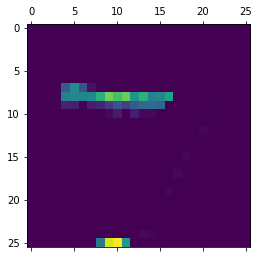

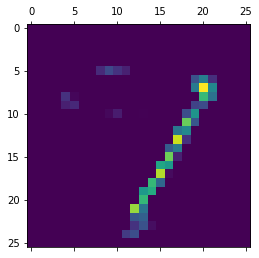

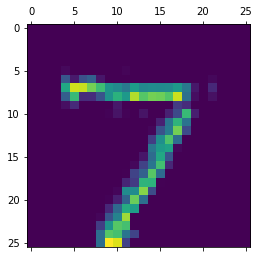

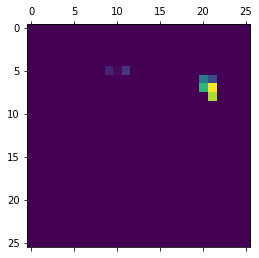

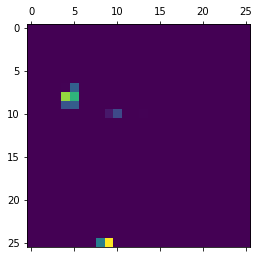

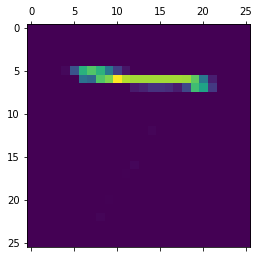

In [3]:
# Извлечем выходы слоев нашей сети
layer_outputs = [layer.output for layer in model.layers] 
# Создадим копию модели, которая вернет эти выходы для заданного входа
activation_model = Model(inputs=model.input, outputs=layer_outputs) 
# Получим список массивов Numpy, по одному на выход каждого слоя
activations = activation_model.predict(X_test[:1])
#Выход входного слоя сети - исходное изображение
input_layer_activation = activations[0]
# Его размерность - (1, 28, 28, 1)
print(input_layer_activation.shape)
plt.matshow(input_layer_activation[0, :, :, 0], cmap='gray')
#Выход первого сверточного слоя сети - 6 матриц активации, результат применения 6 сверток к входному изображению
first_layer_activation = activations[1]
# Его размерность - (1, 28, 28, 6)
print(first_layer_activation.shape)
#Визуализируем поверхности активации:
for i_conv in range(6):
    plt.matshow(first_layer_activation[0, :, :, i_conv], cmap='viridis')

# Домашнее задание

1. Проработайте блокнот Jupyter содержащий пример, демонстрировавшийся на занятии.
2. Решите по аналогии задачу распознавания для датасета кириллических рукописных букв датасета CoMNIST
https://github.com/GregVial/CoMNIST 